<a href="https://colab.research.google.com/github/BriannaPoirier/FDSfE_BPoirier/blob/main/HW3/HW3_Geospatial_Analysis_of_2016_Election_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3: Geospatial Analysis of 2016 Elections in USA - GEOG271**

**By: Brianna Poirier**

**Objective:** Conduct spatial analysis and maps.

Case Study: 2016 Voting in Wisconsin (adapted from https://datascience.quantecon.org/applications/maps.html)

In [51]:
# Install packages to colab environment
!sudo apt-get update && apt-get install -y libspatialindex-dev
!pip install rtree
!pip install geopandas

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,344 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,316 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main am

In [52]:
# Import spatial analytics library
import pandas as pd
import geopandas as gpd #combines the capabilities of pandas and shapely for geospatial operations
from shapely.geometry import Point, Polygon, MultiPolygon #for manipulating text data into geospatial shapes
from shapely import wkt #stands for "well known text", allows for interchange across GIS programs
import rtree #supports geospatial join

pd.set_option('display.max_columns', None) #visualize all columns in dataframe

import warnings
warnings.filterwarnings('ignore')

**1) Loading the World Map**

In [53]:
# Grab low resolution world file
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

**2) Display the First 5 Rows of the Data**

In [55]:
# Display the first 5 rows of the data
world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [56]:
# Get description of the data
world.describe

<bound method NDFrame.describe of             pop_est      continent                      name  gdp_md_est  \
iso_a3                                                                     
FJI        889953.0        Oceania                      Fiji        5496   
TZA      58005463.0         Africa                  Tanzania       63177   
ESH        603253.0         Africa                 W. Sahara         907   
CAN      37589262.0  North America                    Canada     1736425   
USA     328239523.0  North America  United States of America    21433226   
...             ...            ...                       ...         ...   
SRB       6944975.0         Europe                    Serbia       51475   
MNE        622137.0         Europe                Montenegro        5542   
-99       1794248.0         Europe                    Kosovo        7926   
TTO       1394973.0  North America       Trinidad and Tobago       24269   
SSD      11062113.0         Africa                  S.

In [57]:
world.describe()

,pop_est,gdp_md_est
count,1.770000e+02,1.770000e+02
mean,4.324346e+07,4.934739e+05
std,1.513543e+08,2.019326e+06
min,1.400000e+02,1.600000e+01
25%,3.301000e+06,1.346900e+04
50%,1.019232e+07,5.040000e+04
75%,3.182530e+07,2.619210e+05
max,1.397715e+09,2.143323e+07


In [58]:
# Get information about the data
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 177 entries, FJI to SSD
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   gdp_md_est  177 non-null    int64   
 4   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 12.4+ KB


**3) Display Map Using Plot Function**

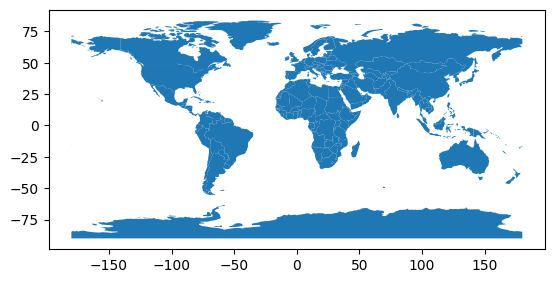

In [59]:
# Show the map
world.plot();

**4) Display the Map of USA**

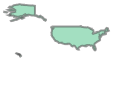

In [60]:
# Show the geometry of the USA
world.loc["USA", 'geometry']

**5) Load the USA State Data**

In [61]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


**6) Plot Wisconsin State Boundary**

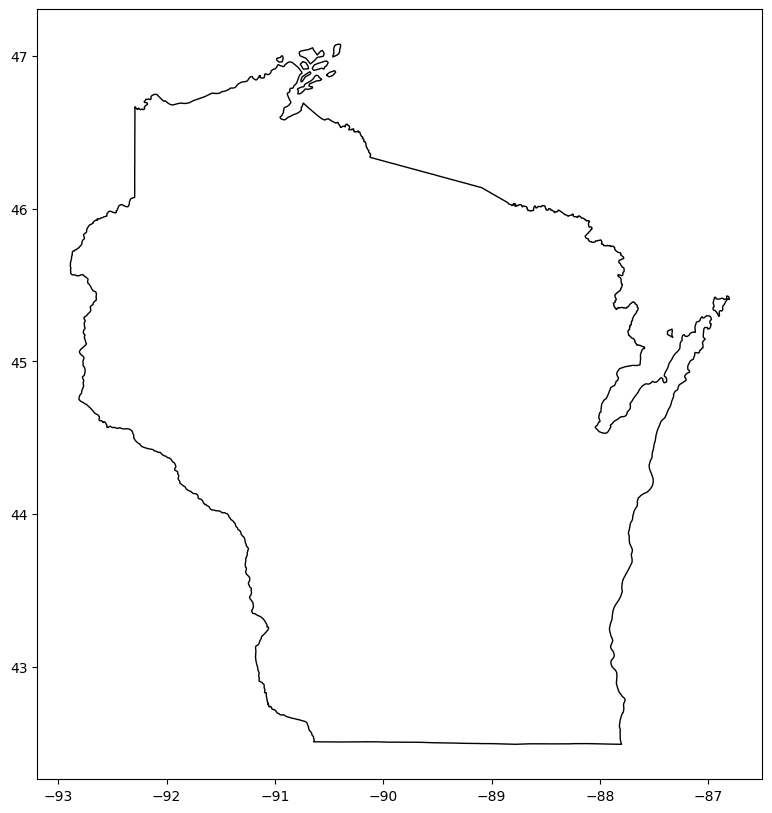

In [62]:
import matplotlib.pyplot as plt
fig, gax = plt.subplots(figsize=(10, 10))
state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")
plt.show()

**7) Load County Data for Wisconsin State**

In [63]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


In [64]:
county_df = county_df.query("STATEFP == '55'")

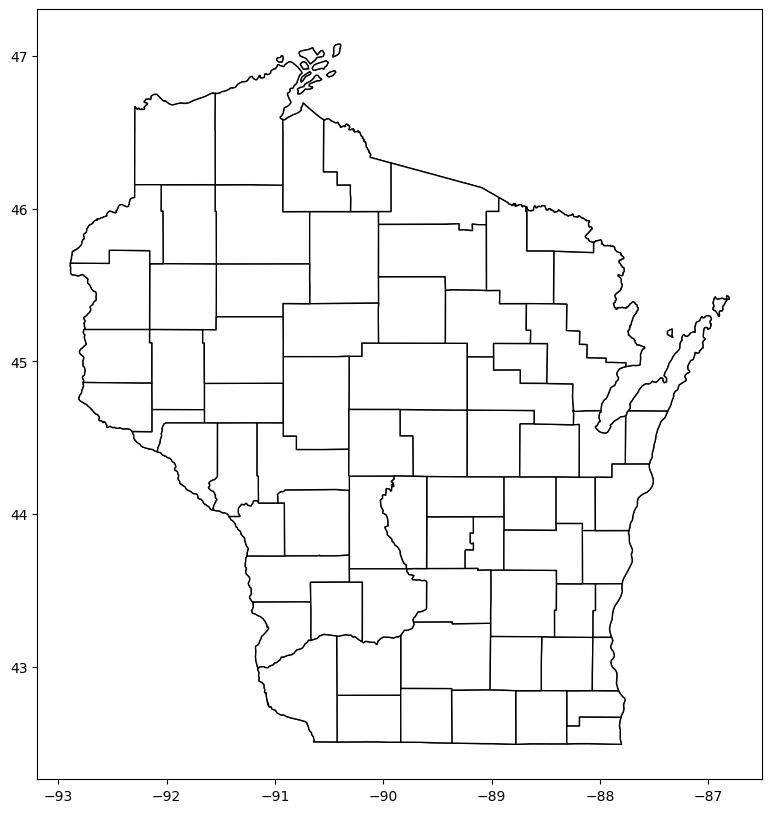

In [65]:
# Plot Wisconsin county data
fig, gax = plt.subplots(figsize=(10, 10))
state_df.query("NAME == 'Wisconsin'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")
plt.show()

**8) Load Voting Results for 2016 between Trump and Clinton in Wisconsin State**

In [66]:
results = pd.read_csv("https://datascience.quantecon.org/assets/data/ruhl_cleaned_results.csv", thousands=",")
results.head()

,county,total,trump,clinton
0,ADAMS,10130,5966,3745
1,ASHLAND,8032,3303,4226
2,BARRON,22671,13614,7889
3,BAYFIELD,9612,4124,4953
4,BROWN,129011,67210,53382


In [67]:
results["county"] = results["county"].str.title()
results["county"] = results["county"].str.strip()
county_df["NAME"] = county_df["NAME"].str.title()
county_df["NAME"] = county_df["NAME"].str.strip()

**9) Spatially Join the Voting Results and County Geometry**

In [68]:
res_states = county_df.merge(results, left_on="NAME", right_on="county", how="inner")

In [69]:
res_states.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton
0,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",Eau Claire,55025,23331,27340
1,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157...",Sawyer,9137,5185,3503
2,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843...",Racine,94302,46681,42641
3,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681...",Portage,38589,17305,18529
4,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678...",Waupaca,26095,16209,8451


In [70]:
%%time
res_states["trump_share"] = res_states["trump"] / (res_states["total"])
res_states["rel_trump_share"] = res_states["trump"] / (res_states["trump"]+res_states["clinton"])
res_states.head()

CPU times: user 9.61 ms, sys: 0 ns, total: 9.61 ms
Wall time: 36.6 ms


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,county,total,trump,clinton,trump_share,rel_trump_share
0,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"POLYGON ((-91.65045 44.85595, -90.92225 44.857...",Eau Claire,55025,23331,27340,0.424007,0.460441
1,55,113,01581116,0500000US55113,55113,Sawyer,06,3256410077,240690443,"POLYGON ((-91.55128 46.15704, -91.23838 46.157...",Sawyer,9137,5185,3503,0.567473,0.596800
2,55,101,01581111,0500000US55101,55101,Racine,06,861267826,1190381762,"POLYGON ((-88.30638 42.84210, -88.06992 42.843...",Racine,94302,46681,42641,0.495016,0.522615
3,55,097,01581109,0500000US55097,55097,Portage,06,2074100548,56938133,"POLYGON ((-89.84493 44.68494, -89.34592 44.681...",Portage,38589,17305,18529,0.448444,0.482921
4,55,135,01581127,0500000US55135,55135,Waupaca,06,1936525696,45266211,"POLYGON ((-89.22374 44.68136, -88.60516 44.678...",Waupaca,26095,16209,8451,0.621153,0.657299


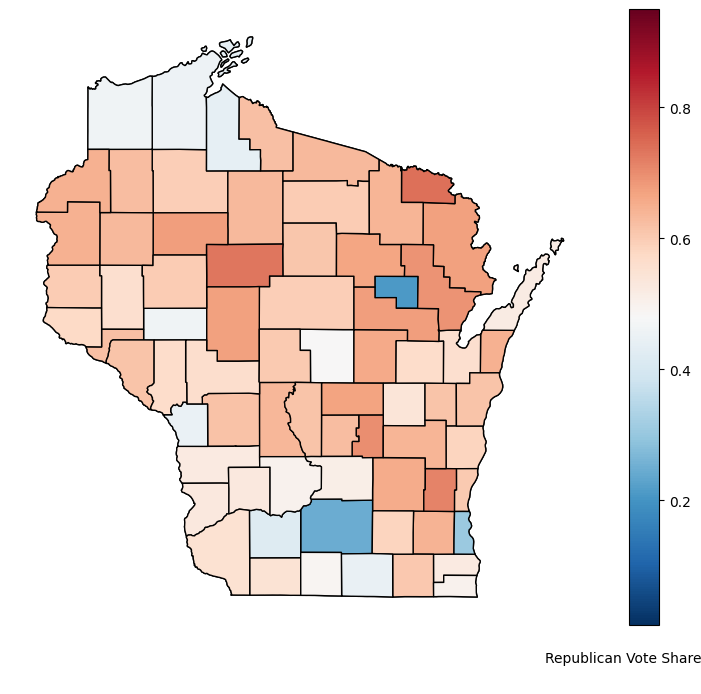

In [71]:
fig, gax = plt.subplots(figsize = (10,8))

# Plot the state
state_df[state_df['NAME'] == 'Wisconsin'].plot(ax = gax, edgecolor='black',color='white')

# Plot the counties and pass 'rel_trump_share' as the data to color
res_states.plot(ax=gax, edgecolor='black', column='rel_trump_share', legend=True, cmap='RdBu_r', vmin=0.01, vmax=0.95)

# Add text to let people know what we are plotting
gax.annotate('Republican Vote Share',xy=(0.545, 0.04),  xycoords='figure fraction')

# No axis with long and lat
plt.axis('off')

plt.show()

**10) How many counties did Trump win?**


> Trump won 60 counties.





In [72]:
res_states.eval("trump > clinton").sum()

60

**11) How many counties did Clinton win?**


> Clinton won 12 counties.



In [73]:
res_states.eval("clinton > trump").sum()

12

**12) How many votes did trump have in total?**


> Trump had 1,405,284 votes in total.



In [74]:
res_states.eval("trump").sum()

1405284

**13) How many votes did Clinton have in total?**


> Clinton had 1,382,536 votes in total.



In [75]:
res_states.eval("clinton").sum()

1382536

**14) Who won? What was the vote difference?**


> Trump won in the state of Wisconsin by obtaining 22748 more votes than Clinton did.



In [76]:
res_states.eval("trump").sum() - res_states.eval("clinton").sum()

22748

In [77]:
res_states.eval("trump - clinton").sum()

22748